# Case study 1st

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [56]:
data = pd.read_csv("Dataset/funding.csv")
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [92]:
'''
Question 1: 
Find out what type of startups are getting funded in the last few years? 
Who are the important investors? 
What are the hot fields that get a lot of funding in these day?

''' 
data = pd.read_csv("Dataset/funding.csv")
fundType = data.InvestmentType.describe().top

data = data[data.InvestmentType == fundType]
data = data.replace(['Undisclosed investors'],'emp')
data = data.replace(['Undisclosed Investors'],'emp')
data = data[data.InvestorsName != 'emp']
invName = data.InvestorsName.describe().top

data = pd.read_csv("Dataset/funding.csv")
invType = data.IndustryVertical.value_counts().index.tolist()[0]

print(f"startup funding => {fundType} and, Important investor => {invName} and, Important investmment Type => {invType}")

startup funding => Seed Funding and, Important investor => Indian Angel Network and, Important investmment Type => Consumer Internet


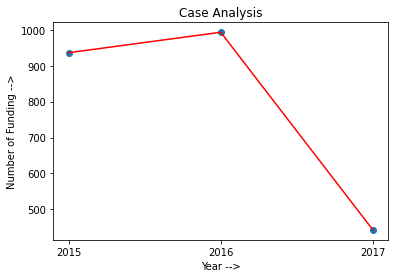

In [118]:
'''
Check the trend of investments over the years. To check the trend, find -Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

'''
with open("Dataset/funding.csv") as data:
    file_data = csv.DictReader(data)
    year = []
    for i in file_data:
        year.append(i['Date'][len(i['Date'])-4:])
    np_year=np.array(year, dtype='int')
        
    #print(year)
    year_dic = dict()
    for yea in np_year:
        if yea in year_dic.keys():
            year_dic[yea] += 1
        else:
            year_dic[yea] = 1
    #print(year_dic) 
    
    x_axis = []
    y_axis = []
    for i in year_dic.keys():
        x_axis.append(i)
        y_axis.append(year_dic[i])
    
    #print(x_axis)
    #print(y_axis)
    
    plt.plot(x_axis,y_axis,color="red")
    plt.scatter(x_axis,y_axis)
    plt.xticks(x_axis)
    
    plt.xlabel("Year -->")
    plt.ylabel("Number of Funding -->")
    
    plt.xticks(size=10)
    plt.yticks(size=10)
    
    plt.title("Case Analysis")
    plt.show()

Bangalore 635 Start-ups
Mumbai 449 Start-ups
New Delhi 389 Start-ups
Gurgaon 241 Start-ups
Pune 91 Start-ups
Noida 79 Start-ups
Hyderabad 77 Start-ups
Chennai 67 Start-ups
Ahmedabad 35 Start-ups
Jaipur 25 Start-ups
Kolkata 19 Start-ups


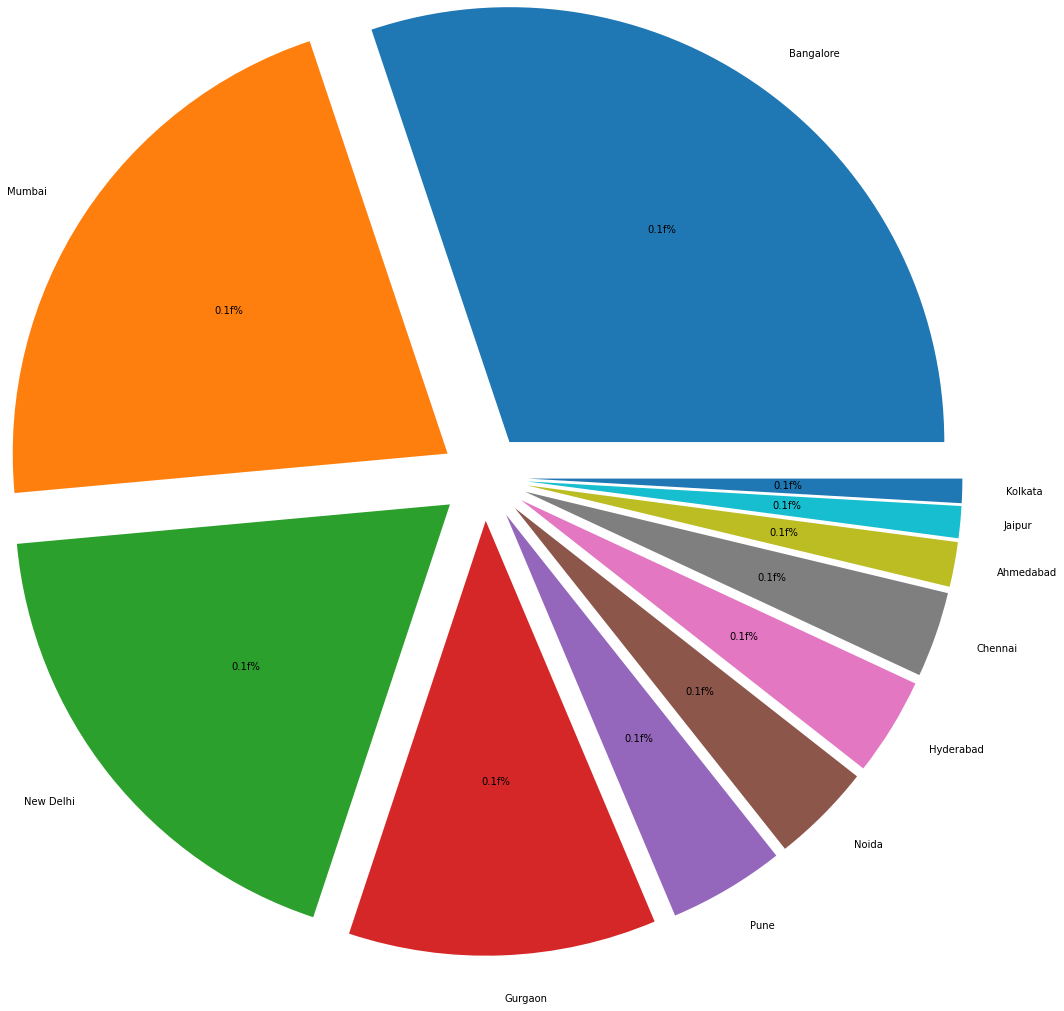

In [148]:
'''
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ? Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

'''
import operator
with open("Dataset/funding.csv") as data:
    file_data = csv.DictReader(data, skipinitialspace=True)
    city = []
    for i in file_data:
        city.append(i['CityLocation'])
        
    np_city = np.array(city)
    np_city = np_city[np_city != '']
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    
    #handling two location seprted by '/'
    for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()
        
    #print(np_city)     
    
    city_dic = dict()
    for i in np_city:
        if i in city_dic.keys():
            city_dic[i] += 1
        else:
            city_dic[i] = 1

    city_dic = dict( sorted(city_dic.items(), key=operator.itemgetter(1),reverse=True)[:11]) # takking only top 10 ci
    #print(city_dic)
    
    x_axis = []
    y_axis = []
    for i in city_dic.keys():
        x_axis.append(i)
        y_axis.append(city_dic[i])
    
    #rint(x_axis)
    #print(y_axis)
    
    plt.pie(y_axis,labels = x_axis,autopct="0.1f%%",radius = 5,explode = [0.5 for i in range(11)])
    
    for i in range(len(x_axis)):
        print(x_axis[i], y_axis[i], 'Start-ups')